In [15]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage import morphology

#For various morphological operations
from skimage.morphology import binary_dilation, binary_erosion, binary_closing, binary_opening, disk
from scipy.ndimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage.draw import circle_perimeter

Pretty printing has been turned ON


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

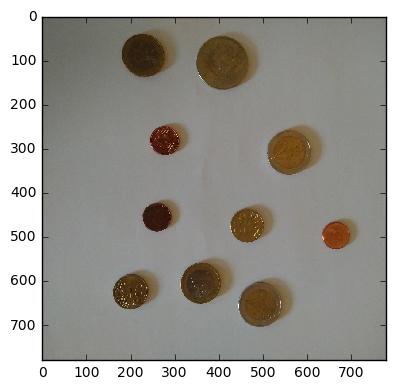

In [16]:
Path = './images/'
image_name = 'coins.jpg'
coins = img_as_ubyte(imread(Path.__add__(image_name)))

scaled_coins = rescale(coins,0.25)
imshow(scaled_coins)

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

0.396405605086


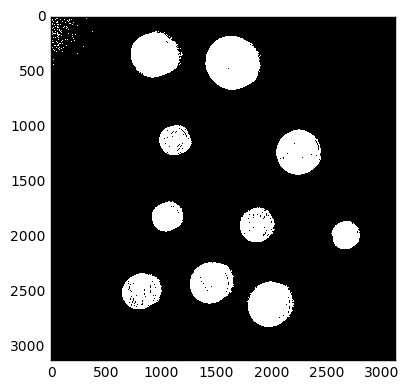

In [17]:
togray=rgb2gray(coins)
imshow(togray)

th= threshold_otsu(togray)
print (th)
res_otsu_th = togray  <= th
#res_th = togray  >= th
imshow(res_otsu_th)

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

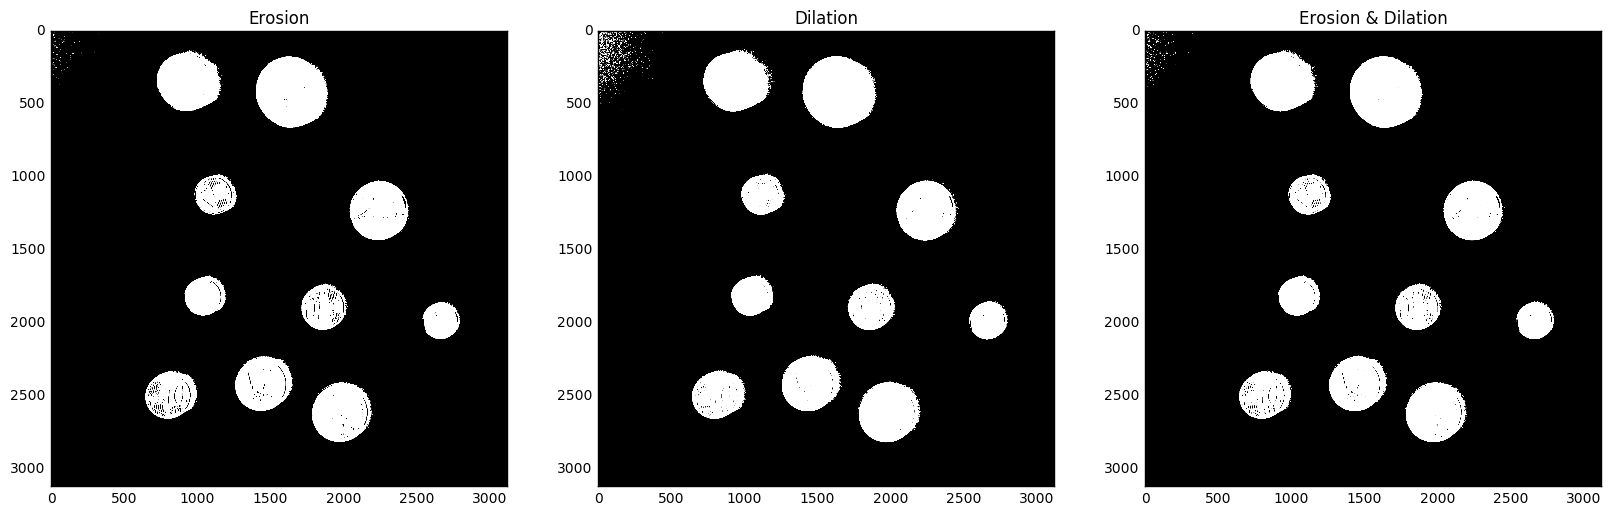

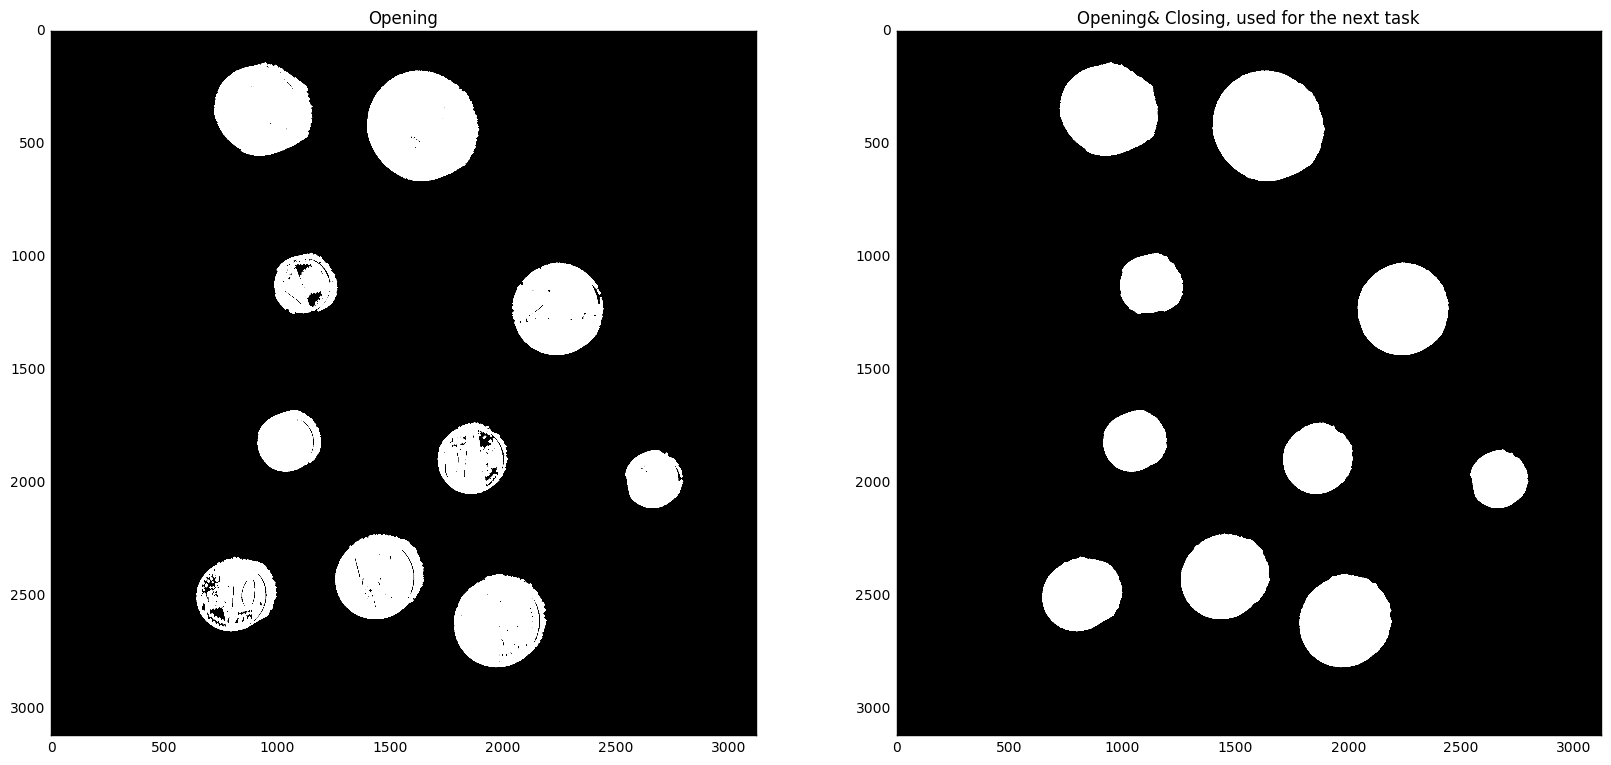

In [18]:
fig = plt.figure(figsize=(20,10))

a = fig.add_subplot(1,3,1)
a.set_title("Erosion")
erosion = binary_erosion(res_otsu_th)
imgplot = plt.imshow(erosion, cmap=cm.Greys_r)

a=fig.add_subplot(1,3,2)
a.set_title("Dilation")
dilation =  binary_dilation(res_otsu_th)
imgplot = plt.imshow(dilation, cmap=cm.Greys_r)

a=fig.add_subplot(1,3,3)
a.set_title("Erosion & Dilation")
edilation =  binary_dilation(erosion)
imgplot = plt.imshow(edilation, cmap=cm.Greys_r)

fig1 = plt.figure(figsize=(20,10))

b=fig1.add_subplot(1,2,1)
b.set_title("Opening")
opening= binary_opening(res_otsu_th, disk(2), iterations=3)
imgplot = plt.imshow(opening, cmap=cm.Greys_r)

b=fig1.add_subplot(1,2,2)
b.set_title("Opening& Closing, used for the next task")
closing= binary_closing(opening,disk(6),iterations=4)
imgplot = plt.imshow(closing, cmap=cm.Greys_r)

# Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

10 objects were found
radius 0: 209.85880785093798
radius 1: 244.97524916110842
radius 2: 137.6345085600619
radius 3: 202.7568948776069
radius 4: 137.9290649846747
radius 5: 154.9334861703306
radius 6: 127.29197322022972
radius 7: 191.39336459740923
radius 8: 169.25311375864382
radius 9: 203.98321012293863


C:\Program Files\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


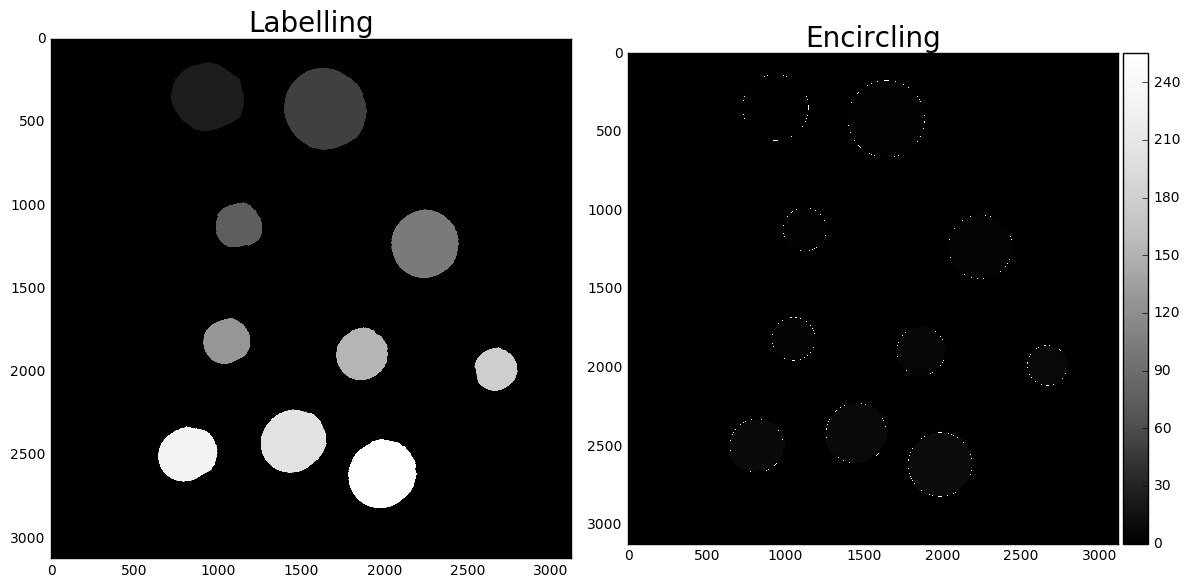

In [19]:
det_coins, num = label(closing, neighbors=4, background =0,return_num=True, connectivity=2)

print (str(num) + ' objects were found')

fig = plt.figure(figsize=(12,12))

a=fig.add_subplot(1,2,1)
a.set_title('Labelling',fontsize=20)
imgplot = plt.imshow(det_coins, cmap = cm.Greys_r)

reprops = regionprops(det_coins)

for i in range (len(reprops)):
    rad=reprops[i].equivalent_diameter/2
    print ('radius ' + str(i) + ': ' + str(rad))
    circo = circle_perimeter(int(reprops[i].centroid[0]), int(reprops[i].centroid[1]), int(rad))
    det_coins[circo[0], circo[1]] = 255
    
a=fig.add_subplot(1,2,2)
a.set_title('Encircling',fontsize=20)
imgplot = imshow(det_coins,  cmap = cm.Greys_r)


## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

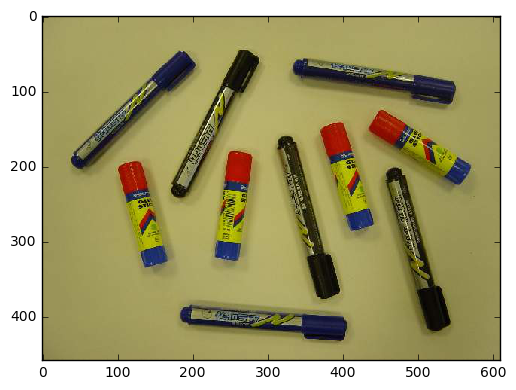

In [20]:
image_name = 'objets4.jpg'
markers_initial = img_as_ubyte(imread(Path.__add__(image_name)))
fig=plt.figure()
imgplot = imshow(markers_initial)

Opening->Closing->Dilation->Erosion->Closing


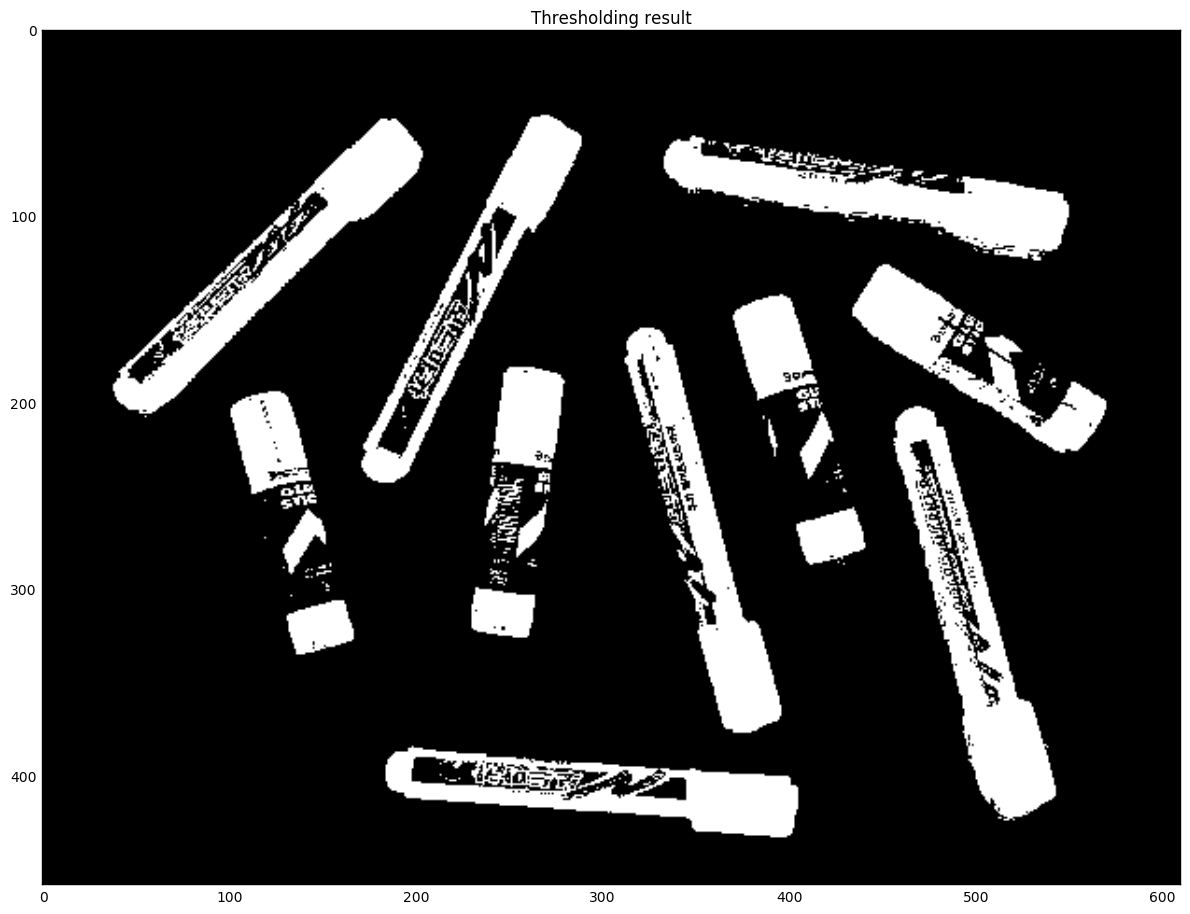

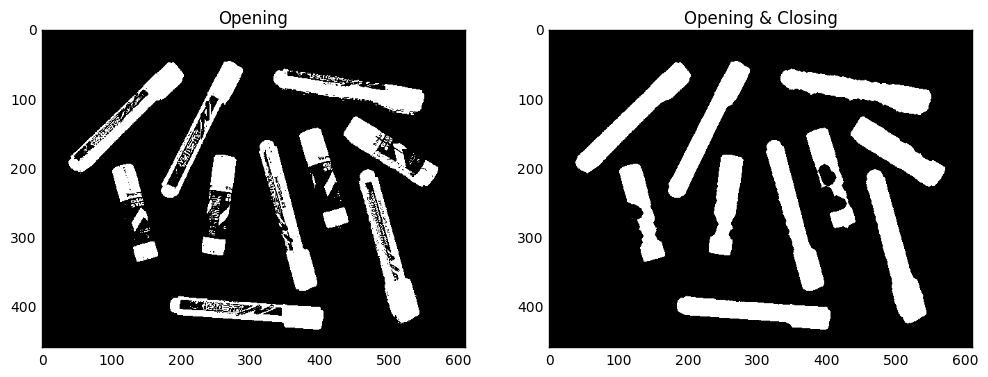

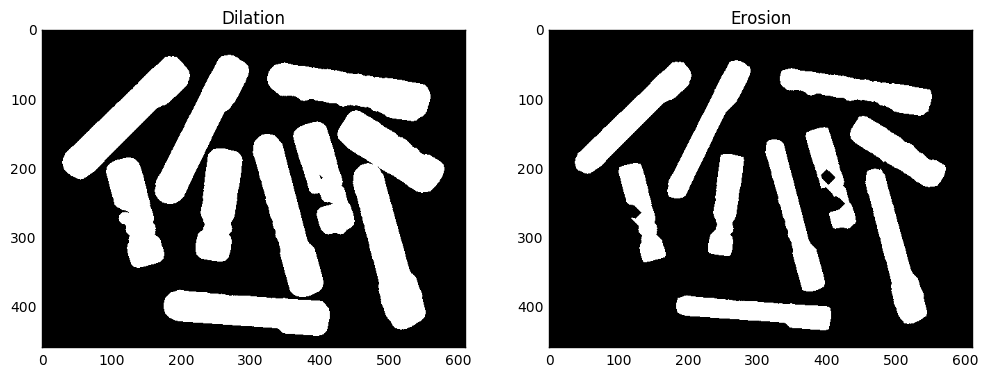

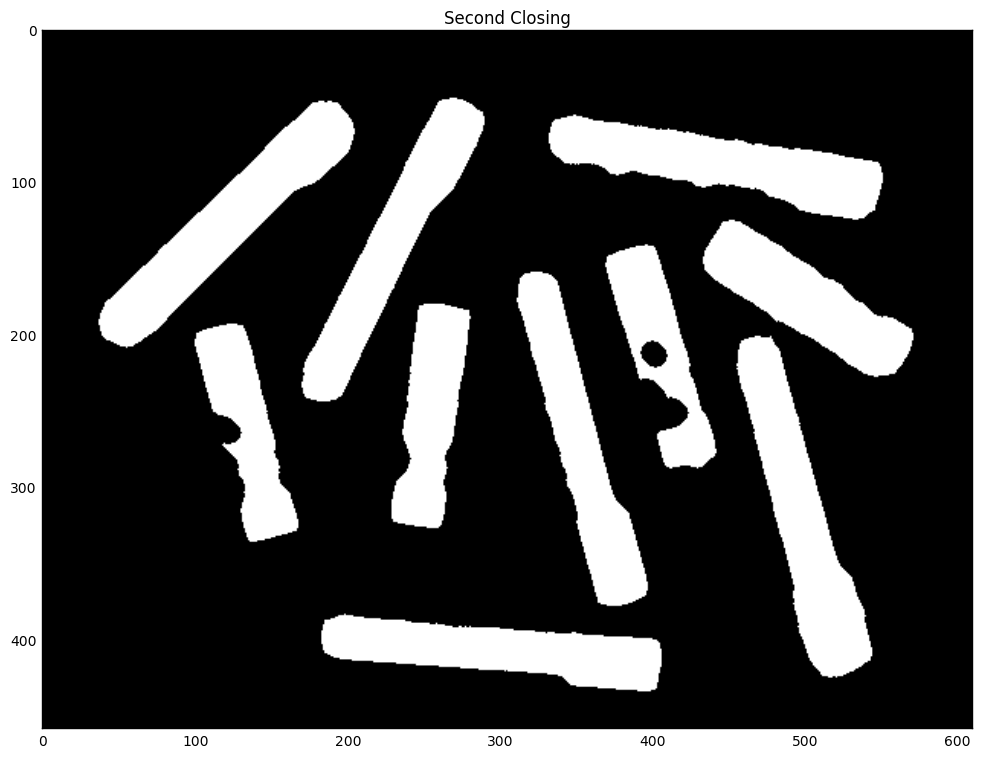

In [21]:
fig1 = plt.figure(figsize=(12,12))

a=fig1.add_subplot(1,1,1)
a.set_title("Thresholding result")
togray=rgb2gray(markers_initial)
imshow(togray)
markers_th= threshold_otsu(togray)
res_markers_th = togray  <= th
#res_th = togray  >= th
imgplot = plt.imshow(res_markers_th, cmap=cm.Greys_r)

print('Opening->Closing->Dilation->Erosion->Closing')

fig2 = plt.figure(figsize=(12,12))

b=fig2.add_subplot(1,2,1)
b.set_title("Opening")
opening_markers= binary_opening(res_markers_th, disk(0), iterations=5)
imgplot = plt.imshow(opening_markers, cmap=cm.Greys_r)

b=fig2.add_subplot(1,2,2)
b.set_title("Opening & Closing")
closing_markers= binary_closing(opening_markers,disk(3),iterations=3)
imgplot = plt.imshow(closing_markers, cmap=cm.Greys_r)

fig3 = plt.figure(figsize=(12,12))


c = fig3.add_subplot(1,2,1)
c.set_title("Dilation")
dilation_markers = binary_dilation(closing_markers, disk(9), iterations=1)
imgplot = plt.imshow(dilation_markers, cmap=cm.Greys_r)

c = fig3.add_subplot(1,2,2)
c.set_title("Erosion")
res_markers = binary_erosion(dilation_markers, disk(2), iterations=4)
imgplot = plt.imshow(res_markers, cmap=cm.Greys_r)

fig4 = plt.figure(figsize=(12,12))


d=fig4.add_subplot(1,1,1)
d.set_title("Second Closing")
result_markers= binary_closing(res_markers,disk(6),iterations=1)
imgplot = plt.imshow(result_markers, cmap=cm.Greys_r)



10 objects were found
Region 1 - 6641px
Region 2 - 7455px
Region 3 - 7176px
Region 4 - 5808px
Region 5 - 4265px
Region 6 - 6520px
Region 7 - 4707px
Region 8 - 4364px
Region 9 - 7550px
Region 10 - 6515px
Number of markers: 6
Number of glues: 4


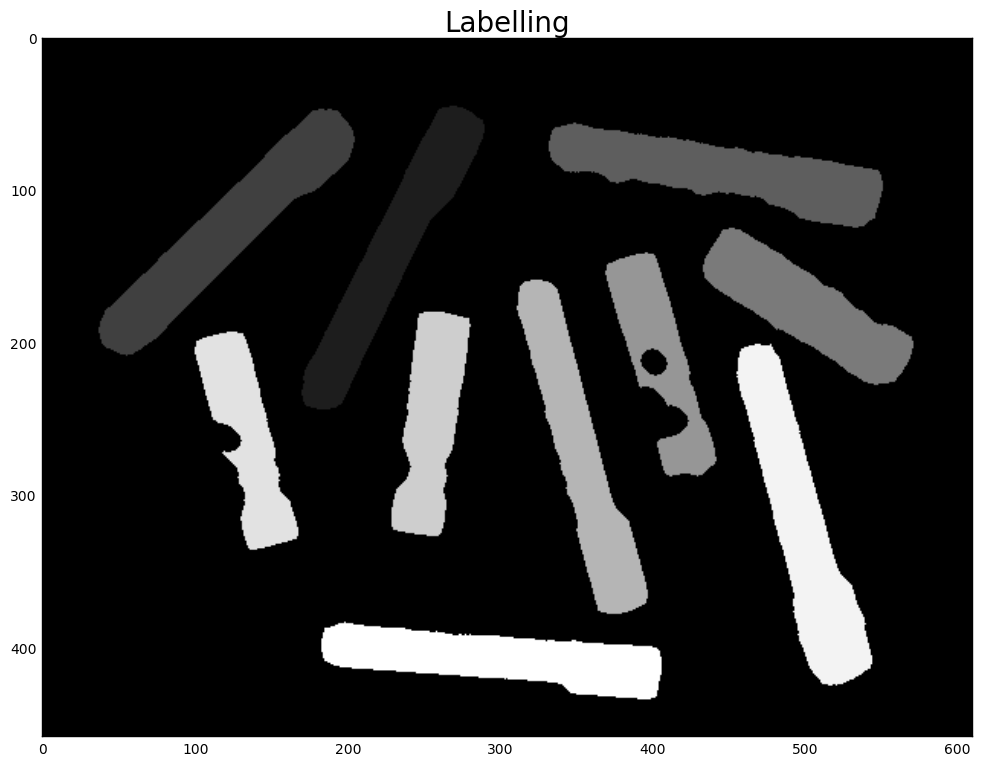

In [22]:
det_markers, num = label(result_markers, neighbors=4, background =0,return_num=True, connectivity=2)

print (str(num) + ' objects were found')

fig = plt.figure(figsize=(12,12))

a=fig.add_subplot(1,1,1)
a.set_title('Labelling',fontsize=20)
imgplot = plt.imshow(det_markers, cmap = cm.Greys_r)

n_markers = 0
n_glues = 0

props = regionprops(det_markers) 


for i in range (len(props)):
    
    print('Region'+' '+ str(i+1)+' - '+ str(props[i].area) +'px')
    
    if props[i].area > 6000:
        n_markers = n_markers + 1
    else:
        n_glues = n_glues +1

result = 'Number of markers: ' + str(n_markers) + '\nNumber of glues: ' + str(n_glues)
print (result)